In [16]:
import os, sys
os.environ['R_HOME'] = sys.exec_prefix+"/lib/R/"
import scFates as scf
scf.set_figure_pubready()
import scvelo as scv
import scanpy as sc

In [2]:
adata_all=sc.read("ML8-9_velo.h5ad")

In [3]:
adata=adata_all[adata_all.obs.leiden=="ZL"]

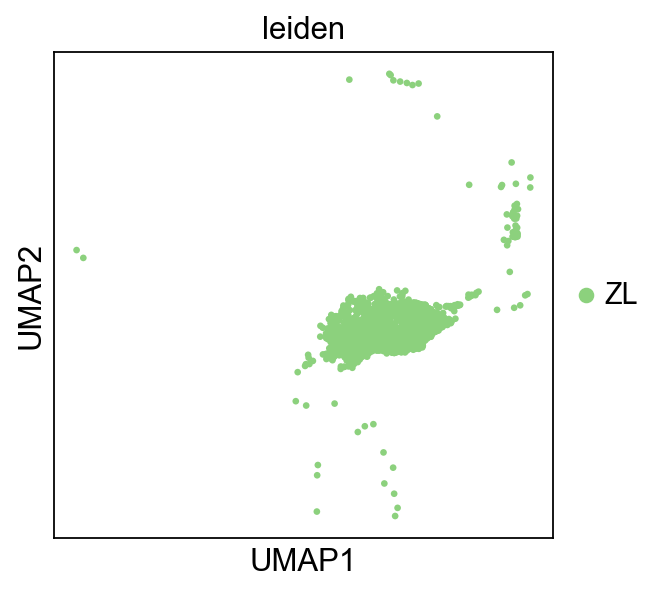

In [4]:
sc.set_figure_params()
sc.pl.umap(adata,color="leiden")


In [5]:
from scipy.spatial import distance_matrix

In [6]:
adata.obs["dist"]=distance_matrix(adata.obsm["X_umap"],adata.obsm["X_umap"].mean(axis=0).reshape(1,-1))

In [7]:
adata=adata[adata.obs["dist"]<2.5]

In [8]:
adata_all.obs["sel"]=adata_all.obs_names.isin(adata.obs_names).astype(str)

In [9]:
adata_ZL=sc.read("../pagoda2/adata_ZL.h5ad")
adata_ZL=adata_ZL[adata.obs_names]
adata.obs["leiden"]=adata_ZL.obs["leiden"]

In [10]:
scv.pp.neighbors(adata)
scv.tl.velocity_graph(adata)
scv.tl.terminal_states(adata)

computing neighbors
    finished (0:00:07) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing velocity graph (using 1/88 cores)


  0%|          | 0/3179 [00:00<?, ?cells/s]

    finished (0:00:16) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


In [11]:
scv.settings._vector_friendly=True

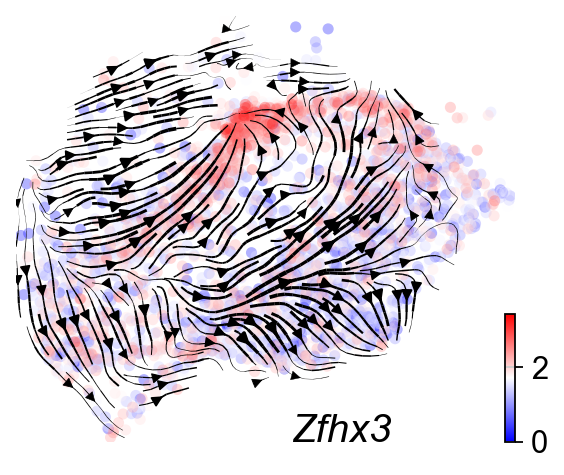

In [22]:
fig,ax=plt.subplots(figsize=(4,3.5))
scv.pl.velocity_embedding_stream(adata,color=['Zfhx3'],ax=ax,
                                 title="",cmap="bwr",ncols=1,show=False,size=100)
ax.annotate("Zfhx3",(0.55,0),xycoords='axes fraction',fontstyle="italic",fontsize=18)
ax.grid(None)
plt.savefig("Zfhx3_E11.svg")

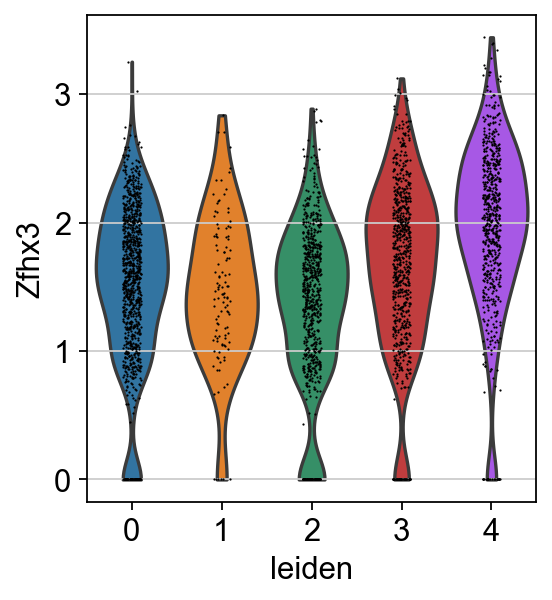

In [25]:
sc.pl.violin(adata,"Zfhx3",groupby="leiden",show=False)
plt.savefig("Zfhx3_E11_violin.pdf")

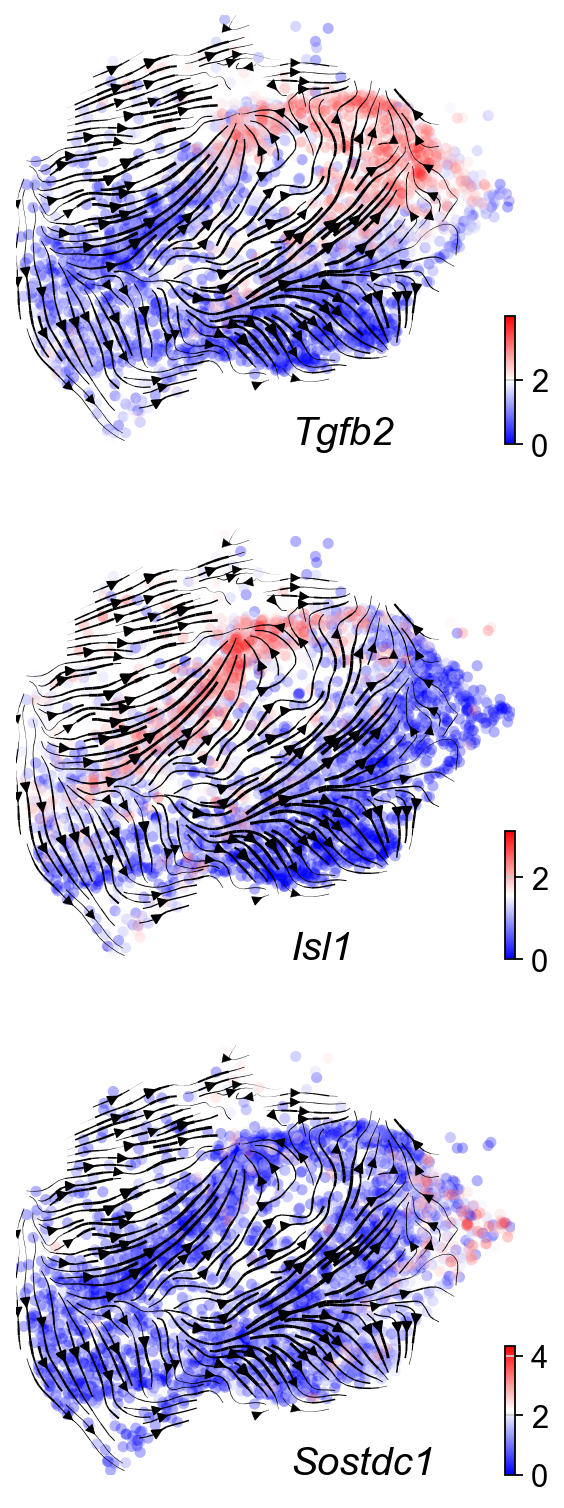

In [13]:
import matplotlib.pyplot as plt
axs=scv.pl.velocity_embedding_stream(adata,color=['Tgfb2',"Isl1","Sostdc1"],
                                 title="",cmap="bwr",ncols=1,show=False,size=100)
for g,ax in zip(['Tgfb2',"Isl1","Sostdc1"],axs):
    ax.grid(None)
    ax.annotate(g,(0.55,0),xycoords='axes fraction',fontstyle="italic",fontsize=18)
plt.savefig("ZL_E11_genes.svg")

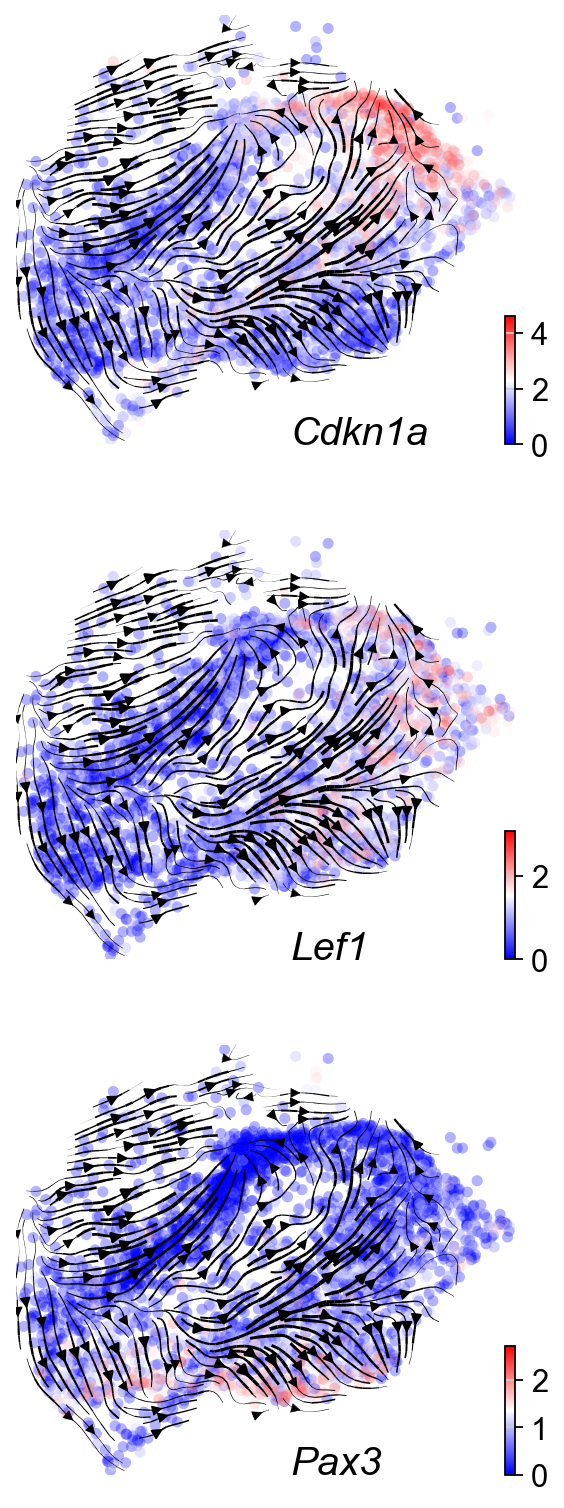

In [14]:
axs=scv.pl.velocity_embedding_stream(adata,color=["Cdkn1a","Lef1",'Pax3'],
                                 title="",cmap="bwr",ncols=1,show=False,size=100)
for g,ax in zip(["Cdkn1a","Lef1",'Pax3'],axs):
    ax.grid(None)
    ax.annotate(g,(0.55,0),xycoords='axes fraction',fontstyle="italic",fontsize=18)
plt.savefig("ZL_E11_genes_2.svg")

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,4))


sc.pl.umap(adata_all,color="sel",groups=["True"],palette=["k","k"],
           title="",legend_loc="none",frameon=False,show=False,ax=ax1)


scv.pl.velocity_embedding_stream(adata,color="leiden",
                                 legend_loc="on data",frameon=False,
                                 legend_fontsize=24,legend_fontoutline=0,
           title="",show=False,ax=ax2)
ax2.grid(None)
for text in ax2.texts:
    text.set_color('white')

scv.pl.scatter(adata, color='end_points',show=False,ax=ax3,title="",cmap="viridis_r")
ax3.grid(None)
plt.savefig("ZL_E11_overview.svg",dpi=600)

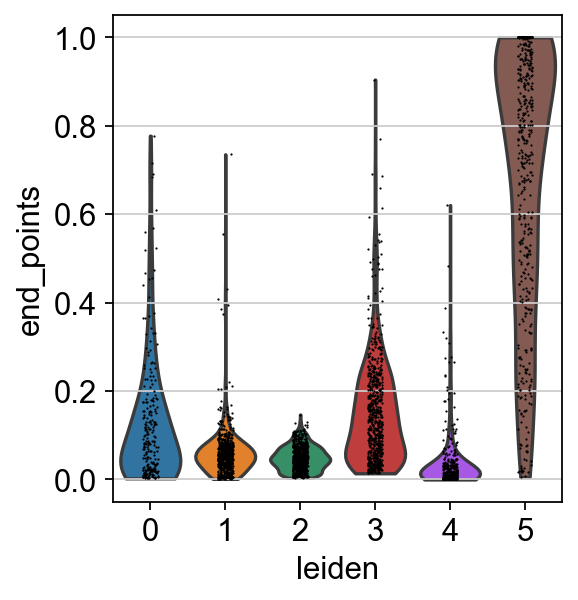

In [26]:
sc.pl.violin(adata,"end_points","leiden")